In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [41]:
df = pd.read_csv("fcc-forum-pageviews.csv",index_col = "date")
df.shape

(1304, 1)

(1304, 1)


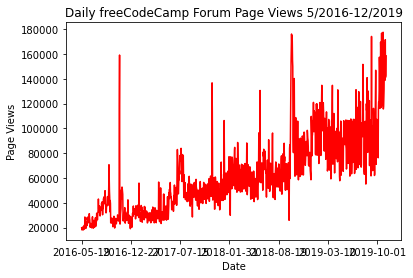

In [42]:
q_1 = df["value"].quantile(q=0.025)
q_2 = df["value"].quantile(q=0.975)

df2 = df[(df["value"] > q_1) & (df["value"] < q_2)]

print(df.shape)

df2.plot(color = "red", legend = False)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()

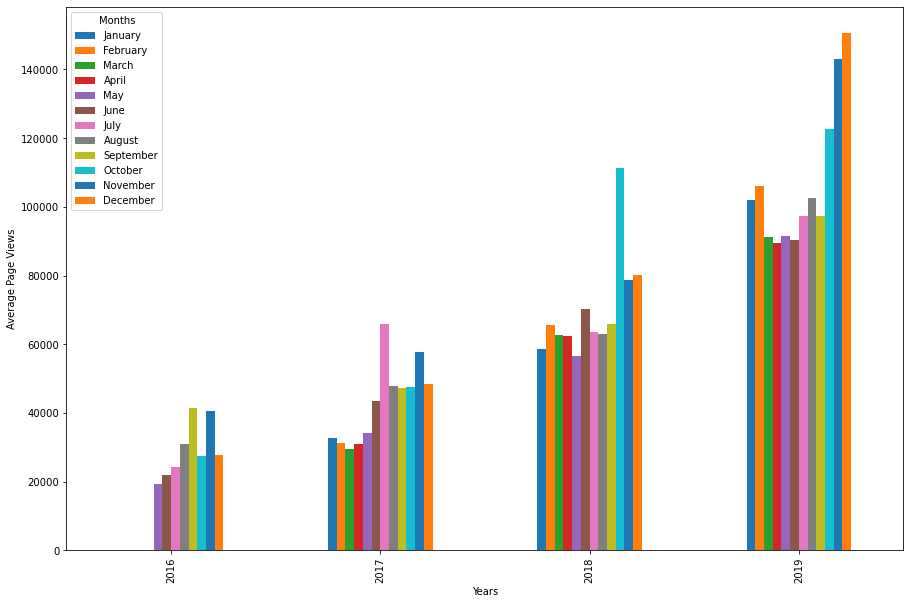

In [28]:
df2_bar = df2.copy()
df2_bar["year"] = pd.DatetimeIndex(df2_bar.index).year
df2_bar["month"] = pd.DatetimeIndex(df2_bar.index).month
df2_bar = df2_bar.groupby(["year", "month"])["value"].mean()
df2_bar = df2_bar.unstack()

# Draw bar plot
fig = df2_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [29]:
df2_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [25]:
df2_bar = df2_bar[sorted(df2_bar.columns)]
df2_bar

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [55]:
# draw bar_plot

df["year"] = pd.DatetimeIndex(df.index).year
df["month"] = pd.DatetimeIndex(df.index).month
df2 = df.groupby(["year","month"], sort = False).mean().reset_index()

df2

,year,month,value
0,2016,5,11242.695652
1,2016,6,19124.366667
2,2016,7,23314.225806
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [56]:
#['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df2["month"].replace({1: "January", 2: "February", 3:'March', 4: 'April', 5: 'May', 6: 'June',
                      7: 'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December' }, inplace=True)
df2

,year,month,value
0,2016,May,11242.695652
1,2016,June,19124.366667
2,2016,July,23314.225806
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


Text(0.5, 20.80000000000002, 'Years')

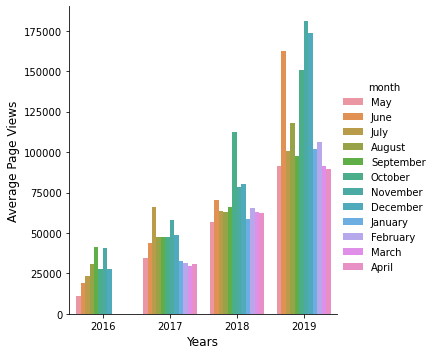

In [57]:

sns.catplot(x = "year", y = "value", hue = "month", kind = "bar", data = df2)

  
# Set label for y-axis
plt.ylabel( "Average Page Views" , size = 12 )
plt.xlabel( "Years" , size = 12 )
# Set title for figure

  
# Display figure


In [ ]:
q_1 = df["value"].quantile(q=0.025)
q_2 = df["value"].quantile(q=0.975)

df3 = df[(df["value"] > q_1) & (df["value"] < q_2)]
len(df3)

In [ ]:
sns.catplot(x = "year", y = "value", hue = "month", kind = "bar", data = df2)

  
# Set label for y-axis
plt.ylabel( "Average Page Views" , size = 12 )
plt.xlabel( "Years" , size = 12 )
# Set title for figure

In [15]:
d = {"month":{0:'Feb', 1:'Sep', 2:'Nov', 3:'Jan'}, 'value': {0:10,1:12,2:15,3:33}}
d

{'month': {0: 'Feb', 1: 'Sep', 2: 'Nov', 3: 'Jan'},
 'value': {0: 10, 1: 12, 2: 15, 3: 33}}

In [16]:
df = pd.DataFrame(d)
df

,month,value
0,Feb,10
1,Sep,12
2,Nov,15
3,Jan,33


In [17]:
order = ['Jan', 'Feb', 'Sep', 'Nov']

In [20]:
df.index = pd.CategoricalIndex(df['month'], categories=order, ordered = True)
df
df = df,

,month,value
month,,
Feb,Feb,10
Sep,Sep,12
Nov,Nov,15
Jan,Jan,33


In [51]:
for i in range(1,13):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
